  #  Linear Reg using Gradient Descent

#### Libraries Used:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

----------------------------------

#### Reading Data Using PANDAS 
Data source : **[Nhanes](https://wwwn.cdc.gov/Nchs/Nhanes/)**


We will train our data on the first 1000 and data points and will test it on the next 200

In [51]:
naval = ['NAN','Misssing','missing','MISSING']
dx = pd.read_csv('survey_results_public.csv',na_values= naval)  
schema_dx = pd.read_csv('survey_results_schema.csv', index_col='Column')
filt = pd.isna(dx.WorkWeekHrs) | pd.isna(dx.ConvertedComp)    
df = dx[-filt]
da_train = df.head(800)
da_test = df.iloc[801:1001]

In [52]:
da_train.loc[:,("WorkWeekHrs","ConvertedComp")].head(10)

,WorkWeekHrs,ConvertedComp
7,39.0,116000.0
9,36.0,32315.0
10,40.0,40070.0
11,40.0,14268.0
12,36.0,38916.0
13,40.0,66000.0
15,50.0,108576.0
16,40.0,79000.0
17,45.0,1260000.0
18,35.0,83400.0


In [53]:
da_test.loc[:,("WorkWeekHrs","ConvertedComp")]

,WorkWeekHrs,ConvertedComp
1214,45.0,165000.0
1215,40.0,1000000.0
1216,60.0,137000.0
1217,37.5,163368.0
1219,55.0,220000.0
...,...,...
1516,35.0,124000.0
1517,35.0,230000.0
1518,40.0,55000.0
1520,54.0,5028.0


In [59]:
X = schema_dx.loc['WorkWeekHrs']
Y = schema_dx.loc['ConvertedComp']
print(f'X is {X[0]}')
print(f'Y is {Y[0]}')
print("Our Hypothesis will be : H(theta) = theta[0] + X*theta[1]")

X is On average, how many hours per week do you work? Please enter a whole number in the box.
Y is Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.
Our Hypothesis will be : H(theta) = theta[0] + X*theta[1]


**Checking for NULL VALUES**

In [60]:
print(f'{len(da_train.WorkWeekHrs),len(da_train.ConvertedComp)}')

(800, 800)


## Defining Function for computing cost and calculation our parameter theta

In [61]:
def comp_cost(in_var,out_var,par):
######FOR COMPUTING COST FUNCTION######
    m=len(in_var)
    cost_sum=0
    for x,y in zip(in_var,out_var):
        h = np.dot(par,np.array([1,x]))
        cost_sum += (h-y)**2
 
    cost = cost_sum/(2*m)

    return cost


def grad(in_var,out_var,par,alpha,max_it): 
########VECTORIZE IMPLEMENTATION OF Gradient Descent##############
    m=len(in_var) 
    cost_store = np.zeros(max_it)
    X = np.array([np.ones(m),in_var])
    i_store = np.zeros(max_it)
    print("INITIALIZING___")
    for i in range(max_it):
        h = np.dot(par,X)
        gradient = np.dot((h - out_var),np.transpose(X)) 
        par = par - (alpha/m)*gradient
        cost_store[i] = comp_cost(in_var,out_var,par)
        i_store[i] = i
      
    plt.plot(i_store,cost_store)  
    plt.ylabel('Cost')
    plt.xlabel('EPOCHS --> ')
    plt.show()
    print(f'Parameter Vector :: {par} cost :: {cost_store[max_it-1]} ') 
    return par,cost_store,i_store        

# Training our Model

INITIALIZING___


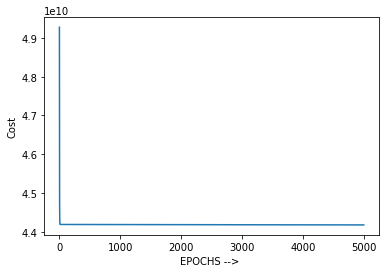

Parameter Vector :: [7676.35465269 3361.6629347 ] cost :: 44179744790.071945 


In [64]:
mit = 5000
thetaC = np.array([0,0])
a = 0.001
theta,ts,ist= grad(da_train.WorkWeekHrs,da_train.ConvertedComp,thetaC,a,mit)

In [65]:
print(f'Our parameter vector is {theta}')

Our parameter vector is [7676.35465269 3361.6629347 ]


### PLOTING OUR REGRESSION LINE

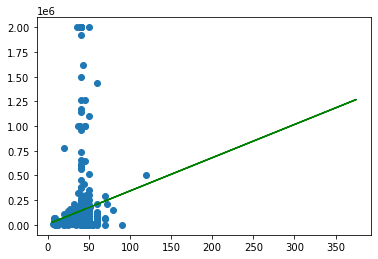

In [93]:
plt.scatter(da_train.WorkWeekHrs,da_train.ConvertedComp)
plt.plot(da_test.WorkWeekHrs,theta[0] + theta[1]*da_test.WorkWeekHrs,'g')
# plt.plot(da_test.BPXSY1,theta[0] + theta[1]*da_test.BPXSY1,'g')
plt.show()

# COMPARING OUR MODEL WITH SkLEARN'S MODEL

In [67]:
from sklearn.model_selection import train_test_split as splt
from sklearn.linear_model import LinearRegression as lin_reg
from sklearn.metrics import classification_report as report

In [68]:
x_train,x_test,y_train,y_test = splt(da_train.WorkWeekHrs.head(1000),da_train.ConvertedComp.head(1000),test_size=0.20)

In [79]:
lg = lin_reg()
lg.fit(x_train.values.reshape(-1,1),y_train.dropna().values.reshape(-1,1))

print(lg.coef_[0][0])
print(lg.intercept_)

3161.572416015633
[25129.63051387]


In [70]:
y_pred = lg.predict(x_test.values.reshape(-1,1))

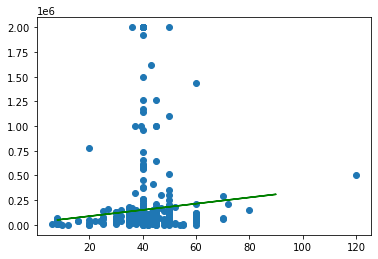

In [94]:
plt.scatter(x_train,y_train)
plt.plot(x_test,lg.intercept_[0] + lg.coef_[0][0]*x_test,'g')